<a href="https://colab.research.google.com/github/Azevedo1996/Analise-de-dados/blob/main/Empresas_Unicornios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Contexto

Uma lista completa de empresas de unicórnios no mundo.
---
Uma empresa de unicórnio, ou startup de unicórnio, é uma empresa privada com uma avaliação de mais de US$ 1 bilhão. 

Em março de 2022, existem 1.000 unicórnios em todo o mundo.

Antigos unicórnios populares incluem Airbnb, Facebook e Google. 

As variantes incluem um decacórnio, avaliado em mais de US 10 bilhões,  e um hectocórnio, avaliado em mais de US 100 bilhões. 

Baixe a lista completa hoje para ver a avaliação de cada empresa, investidores e muito mais.

In [1]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12.75,8.5)
from shapely.geometry import Point, Polygon

In [2]:
# Vizualizando o dataset
unicorn = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projeto de estudo/Arquivos CSV utilizados/Unicorn_Companies.csv')
unicorn.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Inverstors,Founded Year,Total Raised,Financial Stage,Investors Count,Deal Terms,Portfolio Exits
0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2012,$7.44B,IPO,28,8,5
1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2002,$6.874B,None,29,12,None
2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2010,$2.901B,Asset,39,12,1
3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",2005,$3.472B,Acquired,56,13,1
4,Epic Games,$42,10/26/2018,United States,Cary,Other,"Tencent Holdings, KKR, Smash Ventures",1991,$4.377B,Acquired,25,5,2


# Limpando os dados
* A primeira etapa é limpar os dados para facilitar a criação de insights a partir deles.
* Cuidaremos coluna por coluna dos dados.

**Avaliação**

* Para a coluna de avaliação, primeiro vemos que o tipo da coluna é objeto, que é a maneira como os pandas mantêm as strings.

* Também vemos que há um "$" em cada entrada que precisa ser limpa para alterar o tipo da coluna, isso é feito na célula a seguir.

In [3]:
# Convertendo colunas de string em colunas numéricas
unicorn["Valuation ($B)"] = unicorn["Valuation ($B)"].replace({"\$": ""}, regex=True)
unicorn["Valuation ($B)"] = unicorn["Valuation ($B)"].astype(float)

**Aqui, há várias coisas que precisam ser feitas:**

* Precisamos manter o último caractere de string porque ele codifica a quantidade de dinheiro que foi levantada.
* Substituímos, usando regex, o cifrão, M, B, K e Nenhum.
* Converter a coluna para float
* Multiplique cada entrada pelo seguinte sufixo de dinheiro

In [4]:
unicorn["Total Raised Unity"] = unicorn["Total Raised"].str[-1]

unicorn["Total Raised"] = unicorn["Total Raised"].replace({"\$": "", "B$": "", "M$": "", "None": np.nan, "K$": ""}, regex=True)
unicorn["Total Raised"] = unicorn["Total Raised"].astype(float)

for i, row in unicorn.iterrows():
    if row["Total Raised Unity"] == "B":
        unicorn.loc[i, "Total Raised"] = row["Total Raised"] * 1_000_000_000
    elif row["Total Raised Unity"] == "M":
        unicorn.loc[i, "Total Raised"] = row["Total Raised"] * 1_000_000
    elif row["Total Raised Unity"] == "K":
        unicorn.loc[i, "Total Raised"] = row["Total Raised"] * 1_000

unicorn1 = unicorn.drop("Total Raised Unity", axis=1)
unicorn1.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Inverstors,Founded Year,Total Raised,Financial Stage,Investors Count,Deal Terms,Portfolio Exits
0,Bytedance,140.0,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2012,7.440000e+09,IPO,28,8,5
1,SpaceX,100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2002,6.874000e+09,None,29,12,None
2,Stripe,95.0,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2010,2.901000e+09,Asset,39,12,1
3,Klarna,45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",2005,3.472000e+09,Acquired,56,13,1
4,Epic Games,42.0,10/26/2018,United States,Cary,Other,"Tencent Holdings, KKR, Smash Ventures",1991,4.377000e+09,Acquired,25,5,2


Convertendo país, cidade e setor em categoria

Todas essas colunas podem ser convertidas em categorias, o que acelera o código pandas

In [5]:
unicorn1["Country"] = unicorn1["Country"].astype('category')
unicorn1["City"] = unicorn1["City"].astype('category')
unicorn1["Industry"] = unicorn1["Industry"].astype('category')

# Fase Financeira

In [6]:
unicorn1['Financial Stage'] = unicorn1['Financial Stage'].replace({"Acq": "Acquired"})
unicorn1["Financial Stage"] = unicorn1["Financial Stage"].astype('category')

In [7]:
print((unicorn1['Financial Stage'] == 'None').sum() / len(unicorn1))

0.95274831243973


Como há muitos valores ausentes com Fase Financeira ausente, podemos descartar esta coluna.

In [8]:
unicorn2 = unicorn1.drop('Financial Stage', axis=1)
unicorn2.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Inverstors,Founded Year,Total Raised,Investors Count,Deal Terms,Portfolio Exits
0,Bytedance,140.0,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2012,7.440000e+09,28,8,5
1,SpaceX,100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2002,6.874000e+09,29,12,None
2,Stripe,95.0,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2010,2.901000e+09,39,12,1
3,Klarna,45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",2005,3.472000e+09,56,13,1
4,Epic Games,42.0,10/26/2018,United States,Cary,Other,"Tencent Holdings, KKR, Smash Ventures",1991,4.377000e+09,25,5,2


**Colunas de dados**

Podemos converter todas as colunas de dados usando pd.to_datetime.

In [9]:
unicorn2["Date Joined"] = pd.to_datetime(unicorn2["Date Joined"])
unicorn2[unicorn2["Founded Year"] == "None"] = None
unicorn2["Founded Year"] = pd.to_datetime(unicorn2["Founded Year"])

**Consideraremos apenas entradas que tenham o ano de fundação.**

In [10]:
unicorn3 = unicorn2[~unicorn2['Founded Year'].isna()]

# Contagem de investidores

In [11]:
unicorn3['Investors Count'] = unicorn3['Investors Count'].fillna(-10)
unicorn3['Investors Count'] = unicorn3['Investors Count'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# Vizualização dos dados | Plotando os dados

In [12]:
unicorn3.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Inverstors,Founded Year,Total Raised,Investors Count,Deal Terms,Portfolio Exits
0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2012-01-01,7.440000e+09,28,8,5
1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2002-01-01,6.874000e+09,29,12,None
2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2010-01-01,2.901000e+09,39,12,1
3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",2005-01-01,3.472000e+09,56,13,1
4,Epic Games,42.0,2018-10-26,United States,Cary,Other,"Tencent Holdings, KKR, Smash Ventures",1991-01-01,4.377000e+09,25,5,2


**Top 10 Paises**

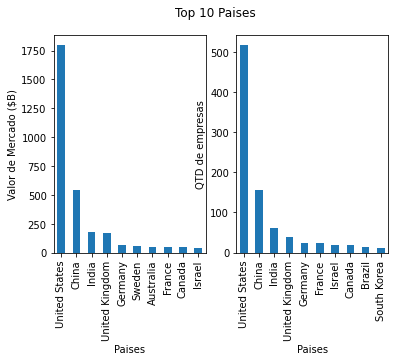

In [13]:
fig, ax = plt.subplots(1,2)
fig.suptitle('Top 10 Paises')

# First plot
paises_unicorn3 = unicorn3.groupby("Country")
paises_unicorn3["Valuation ($B)"].sum().sort_values(ascending=False)[:10].plot(kind='bar', ax=ax[0])
ax[0].set_ylabel('Valor de Mercado ($B)')
ax[0].set_xlabel('Paises')

# Second plot
unicorn3["Country"].value_counts()[:10].plot(kind="bar", ax=ax[1])

ax[1].set_xlabel('Paises')
ax[1].set_ylabel('QTD de empresas')
plt.show();

# Explorando os dados

In [14]:
unicornios = unicorn[['Company','Valuation ($B)','Country','City','Industry','Total Raised','Financial Stage']]
unicornios.head()

,Company,Valuation ($B),Country,City,Industry,Total Raised,Financial Stage
0,Bytedance,140.0,China,Beijing,Artificial intelligence,7.440000e+09,IPO
1,SpaceX,100.3,United States,Hawthorne,Other,6.874000e+09,None
2,Stripe,95.0,United States,San Francisco,Fintech,2.901000e+09,Asset
3,Klarna,45.6,Sweden,Stockholm,Fintech,3.472000e+09,Acquired
4,Epic Games,42.0,United States,Cary,Other,4.377000e+09,Acquired


In [15]:
unicornios.columns = ["Company","Valuation($B)","Country","City","Industry","Total Raised($B)","Financial Stage"]
unicornios

,Company,Valuation($B),Country,City,Industry,Total Raised($B),Financial Stage
0,Bytedance,140.0,China,Beijing,Artificial intelligence,7.440000e+09,IPO
1,SpaceX,100.3,United States,Hawthorne,Other,6.874000e+09,None
2,Stripe,95.0,United States,San Francisco,Fintech,2.901000e+09,Asset
3,Klarna,45.6,Sweden,Stockholm,Fintech,3.472000e+09,Acquired
4,Epic Games,42.0,United States,Cary,Other,4.377000e+09,Acquired
...,...,...,...,...,...,...,...
1032,Timescale,1.0,United States,New York,Internet software & services,1.810600e+08,None
1033,Scalapay,1.0,Italy,Milan,Fintech,7.000000e+08,None
1034,Omada Health,1.0,United States,San Francisco,Health,4.497200e+08,None
1035,BlueVoyant,1.0,United States,New York,Cybersecurity,5.255000e+08,None


In [16]:
# Alterando o tipo de dados de avaliação de objeto para valor flutuante.
unicornios['Valuation($B)']

0       140.0
1       100.3
2        95.0
3        45.6
4        42.0
        ...  
1032      1.0
1033      1.0
1034      1.0
1035      1.0
1036      1.0
Name: Valuation($B), Length: 1037, dtype: float64

In [17]:
# Alterando os tipos de dados de avaliação e o total elevado para float
unicornios['Valuation($B)'].replace({"\$": ""}, regex=True).astype(float)
unicornios["Total Raised($B)"].replace({"\$": "", "B$": "", "M$": "", "None": np.nan, "K$": ""}, regex=True).astype(float)

0       7.440000e+09
1       6.874000e+09
2       2.901000e+09
3       3.472000e+09
4       4.377000e+09
            ...     
1032    1.810600e+08
1033    7.000000e+08
1034    4.497200e+08
1035    5.255000e+08
1036    6.045000e+08
Name: Total Raised($B), Length: 1037, dtype: float64

In [18]:
unicornios.head()

,Company,Valuation($B),Country,City,Industry,Total Raised($B),Financial Stage
0,Bytedance,140.0,China,Beijing,Artificial intelligence,7.440000e+09,IPO
1,SpaceX,100.3,United States,Hawthorne,Other,6.874000e+09,None
2,Stripe,95.0,United States,San Francisco,Fintech,2.901000e+09,Asset
3,Klarna,45.6,Sweden,Stockholm,Fintech,3.472000e+09,Acquired
4,Epic Games,42.0,United States,Cary,Other,4.377000e+09,Acquired


In [19]:
# Estagio financeiro
unicornios1 = unicornios[unicornios['Financial Stage']=="IPO"]
unicornios1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 0 to 319
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           7 non-null      object 
 1   Valuation($B)     7 non-null      float64
 2   Country           7 non-null      object 
 3   City              7 non-null      object 
 4   Industry          7 non-null      object 
 5   Total Raised($B)  7 non-null      float64
 6   Financial Stage   7 non-null      object 
dtypes: float64(2), object(5)
memory usage: 448.0+ bytes


In [20]:
# Para que possamos ver a maioria dos unicórnios que vão IPO estão localizados na China
unicornios1.groupby("Country").count()

,Company,Valuation($B),City,Industry,Total Raised($B),Financial Stage
Country,,,,,,
China,6,6,6,6,6,6
India,1,1,1,1,1,1


In [21]:
# Podemos ver que muitos unicórnios são Fintechs
unicornios.groupby('Industry').count().sort_values("Company", ascending=False)

,Company,Valuation($B),Country,City,Total Raised($B),Financial Stage
Industry,,,,,,
Fintech,205,205,205,205,198,205
Internet software & services,192,192,192,192,189,192
E-commerce & direct-to-consumer,107,107,107,107,107,107
Artificial intelligence,71,71,71,71,69,71
Health,69,69,69,69,67,69
"Supply chain, logistics, & delivery",57,57,57,57,55,57
Other,56,56,56,56,54,56
Cybersecurity,49,49,49,49,49,49
Data management & analytics,41,41,41,41,39,41


In [22]:
# Podemos ver que muitos unicórnios fintech estão localizados nos EUA. 
# Parece que os EUA podem liderar a futura indústria financeira como fizeram na última década.
unicornios[unicornios['Industry']=="Fintech"].groupby("Country").count().sort_values("Company",ascending=False)

,Company,Valuation($B),City,Industry,Total Raised($B),Financial Stage
Country,,,,,,
United States,108,108,108,108,103,108
United Kingdom,25,25,25,25,24,25
India,14,14,14,14,14,14
China,8,8,8,8,7,8
Brazil,5,5,5,5,5,5
France,5,5,5,5,5,5
Germany,5,5,5,5,5,5
Canada,4,4,4,4,4,4
Mexico,4,4,4,4,4,4
